In [1]:
# import libraries
import pandas as pd
import seaborn as sns

# Load dataset "tips" from seaborn
df = sns.load_dataset("tips")

# Quick preview
df.head()
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [2]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
import pandas as pd
import seaborn as sns

# Load the tips dataset
df = sns.load_dataset("tips")

# Calculate tip percentage for each row
df["tip_pct"] = df["tip"] / df["total_bill"] * 100

# Group by day and calculate mean tip percentage
tip_pct_by_day = df.groupby("day")["tip_pct"].mean()#.sort_values(ascending=False)

print(tip_pct_by_day)

day
Thur    16.127563
Fri     16.991303
Sat     15.315172
Sun     16.689729
Name: tip_pct, dtype: float64


C:\Users\midas\AppData\Local\Temp\ipykernel_12408\652995465.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_pct_by_day = df.groupby("day")["tip_pct"].mean()#.sort_values(ascending=False)


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline

In [8]:
from feature_engine.imputation import MeanMedianImputer

In [28]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

df = pd.read_csv(r"C:\Users\midas\Documents\2505-WMCA-Data-Git101\Online Retail\Online Retail.csv")
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [29]:
#df = pd.read_csv('Online_Retail.csv')
df = df.sample(frac=0.5, random_state=5)
df = df.astype({'CustomerID':'object'})
df

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
371060,371060,569209,23284,DOORMAT KEEP CALM AND COME IN,2,10/2/2011 11:30,8.25,16626.0,United Kingdom
384445,384445,570125,23296,SET OF 6 TEA TIME BAKING CASES,8,10/7/2011 13:14,1.25,17509.0,United Kingdom
605,605,536412,22902,TOTE BAG I LOVE LONDON,7,12/1/2010 11:49,2.10,17920.0,United Kingdom
61244,61244,541424,21494,ROTATING LEAVES T-LIGHT HOLDER,2,1/17/2011 17:57,1.63,NaN,United Kingdom
408269,408269,571931,21935,SUKI SHOULDER BAG,5,10/19/2011 16:59,1.63,NaN,United Kingdom
...,...,...,...,...,...,...,...,...,...
516278,516278,579885,22142,CHRISTMAS CRAFT WHITE FAIRY,4,11/30/2011 17:37,1.45,15444.0,United Kingdom
157407,157407,550204,82580,BATHROOM METAL SIGN,1,4/15/2011 10:37,1.25,NaN,United Kingdom
63336,63336,541565,22845,VINTAGE CREAM CAT FOOD CONTAINER,1,1/19/2011 11:48,6.35,14527.0,United Kingdom
479358,479358,577156,23290,SPACEBOY CHILDRENS BOWL,8,11/18/2011 9:57,1.25,13471.0,United Kingdom


In [30]:
df.isnull().sum()

index              0
InvoiceNo          0
StockCode          0
Description      724
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     67736
Country            0
dtype: int64

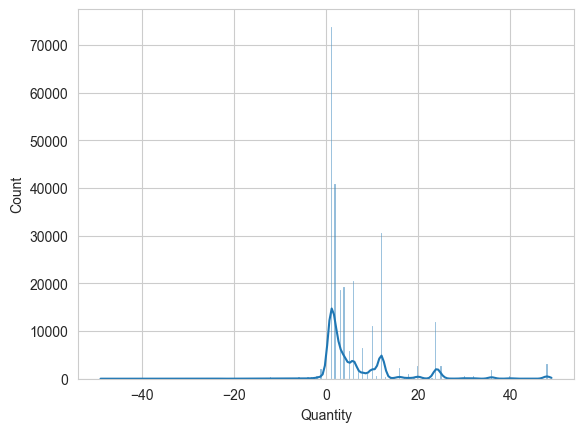

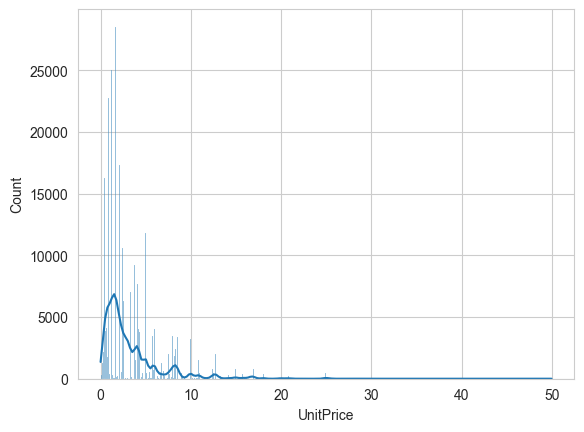

In [31]:
sns.set_style('whitegrid')
for col in ['Quantity' , 'UnitPrice']:
  sns.histplot(data=df.query('Quantity > -50 & UnitPrice > -50 & Quantity < 50 & UnitPrice < 50'), x=col, kde=True)
  plt.show()
  print('\n')

In [32]:
from feature_engine.imputation import MeanMedianImputer
imputer = MeanMedianImputer(imputation_method='median',
                            variables=['Quantity' , 'UnitPrice'])

In [33]:
imputer.fit(df)

MeanMedianImputer(variables=['Quantity', 'UnitPrice'])

In [34]:
imputer.imputer_dict_

{'Quantity': 3.0, 'UnitPrice': 2.08}

In [35]:
df = imputer.transform(df)

In [37]:
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
371060,371060,569209,23284,DOORMAT KEEP CALM AND COME IN,2,10/2/2011 11:30,8.25,16626.0,United Kingdom
384445,384445,570125,23296,SET OF 6 TEA TIME BAKING CASES,8,10/7/2011 13:14,1.25,17509.0,United Kingdom
605,605,536412,22902,TOTE BAG I LOVE LONDON,7,12/1/2010 11:49,2.10,17920.0,United Kingdom
61244,61244,541424,21494,ROTATING LEAVES T-LIGHT HOLDER,2,1/17/2011 17:57,1.63,NaN,United Kingdom
408269,408269,571931,21935,SUKI SHOULDER BAG,5,10/19/2011 16:59,1.63,NaN,United Kingdom
...,...,...,...,...,...,...,...,...,...
516278,516278,579885,22142,CHRISTMAS CRAFT WHITE FAIRY,4,11/30/2011 17:37,1.45,15444.0,United Kingdom
157407,157407,550204,82580,BATHROOM METAL SIGN,1,4/15/2011 10:37,1.25,NaN,United Kingdom
63336,63336,541565,22845,VINTAGE CREAM CAT FOOD CONTAINER,1,1/19/2011 11:48,6.35,14527.0,United Kingdom
479358,479358,577156,23290,SPACEBOY CHILDRENS BOWL,8,11/18/2011 9:57,1.25,13471.0,United Kingdom


In [38]:
df.isnull().sum()

index              0
InvoiceNo          0
StockCode          0
Description      724
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     67736
Country            0
dtype: int64

In [ ]:
df = pd.read_csv(r"C:\Users\midas\Documents\2505-WMCA-Data-Git101\Online Retail\Online Retail.csv")

df = df.sample(frac=0.5, random_state=5)
df = df.astype({'CustomerID':'object'})
df.isnull().sum()

index              0
InvoiceNo          0
StockCode          0
Description      724
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     67736
Country            0
dtype: int64

In [43]:
pipeline = Pipeline([
      ( 'median',  MeanMedianImputer(imputation_method='median',
                                     variables=['Quantity' , 'UnitPrice']) )
])
pipeline

Pipeline(steps=[('median',
                 MeanMedianImputer(variables=['Quantity', 'UnitPrice']))])

In [44]:
pipeline.fit(df)

Pipeline(steps=[('median',
                 MeanMedianImputer(variables=['Quantity', 'UnitPrice']))])

In [45]:
df = pipeline.transform(df)

In [46]:
df.isnull().sum()

index              0
InvoiceNo          0
StockCode          0
Description      724
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     67736
Country            0
dtype: int64

In [47]:
pipeline['median']

MeanMedianImputer(variables=['Quantity', 'UnitPrice'])

In [48]:
pipeline['median'].imputer_dict_

{'Quantity': 3.0, 'UnitPrice': 2.08}

In [50]:
from feature_engine.imputation import ArbitraryNumberImputer

In [51]:
df = pd.read_csv(r"C:\Users\midas\Documents\2505-WMCA-Data-Git101\Online Retail\Online Retail.csv")
df = df.sample(frac=0.5, random_state=5)
df = df.astype({'CustomerID':'object'})
df.isnull().sum()

index              0
InvoiceNo          0
StockCode          0
Description      724
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     67736
Country            0
dtype: int64

In [52]:
pipeline = Pipeline([
      ( 'Quantity',  ArbitraryNumberImputer(arbitrary_number=-100,
                                                  variables=['Quantity']) ),

      ( 'other_variables',  ArbitraryNumberImputer(arbitrary_number=-500,
                                                   variables=['UnitPrice']) )

])
pipeline

Pipeline(steps=[('Quantity',
                 ArbitraryNumberImputer(arbitrary_number=-100,
                                        variables=['Quantity'])),
                ('other_variables',
                 ArbitraryNumberImputer(arbitrary_number=-500,
                                        variables=['UnitPrice']))])

In [53]:
pipeline.fit(df)

Pipeline(steps=[('Quantity',
                 ArbitraryNumberImputer(arbitrary_number=-100,
                                        variables=['Quantity'])),
                ('other_variables',
                 ArbitraryNumberImputer(arbitrary_number=-500,
                                        variables=['UnitPrice']))])

In [54]:
df = pipeline.transform(df)

In [55]:
df.isnull().sum()

index              0
InvoiceNo          0
StockCode          0
Description      724
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     67736
Country            0
dtype: int64

In [56]:
pipeline['Quantity'].imputer_dict_

{'Quantity': -100}

In [57]:
pipeline['other_variables'].imputer_dict_

{'UnitPrice': -500}

In [58]:
from feature_engine.imputation import CategoricalImputer

In [59]:
df = pd.read_csv(r"C:\Users\midas\Documents\2505-WMCA-Data-Git101\Online Retail\Online Retail.csv")
df = df.sample(frac=0.5, random_state=5)
df = df.astype({'CustomerID':'object'})
df.isnull().sum()

index              0
InvoiceNo          0
StockCode          0
Description      724
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     67736
Country            0
dtype: int64

In [60]:
df['Country'].value_counts()

Country
United Kingdom          247695
Germany                   4779
France                    4317
EIRE                      4158
Spain                     1270
Netherlands               1155
Belgium                   1020
Switzerland                988
Portugal                   788
Australia                  626
Norway                     528
Italy                      396
Channel Islands            380
Finland                    326
Cyprus                     303
Sweden                     238
Unspecified                222
Denmark                    208
Austria                    196
Poland                     175
Japan                      171
Israel                     151
USA                        136
Singapore                  131
Hong Kong                  128
Canada                      85
Iceland                     81
Greece                      78
Malta                       65
United Arab Emirates        38
RSA                         25
European Community          22


In [61]:
pipeline = Pipeline([
      ('other_variables',  CategoricalImputer(imputation_method='missing',
                                                   fill_value='Missing',
                                                   variables=['StockCode', 'Description', 'CustomerID']) )
])
pipeline

Pipeline(steps=[('other_variables',
                 CategoricalImputer(variables=['StockCode', 'Description',
                                               'CustomerID']))])

In [62]:
df = pipeline.fit_transform(df)

In [63]:
df.isnull().sum()

index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [64]:
df['StockCode'].value_counts()

StockCode
85123A    1146
22423     1088
85099B    1065
20725      864
47566      840
          ... 
46776e       1
22016        1
46115B       1
85036a       1
79157B       1
Name: count, Length: 3884, dtype: int64

In [68]:
pipeline = Pipeline([
      ( 'categorical_imputer', CategoricalImputer(imputation_method='frequent',
                                                  variables=['Country']) )
])


df = pipeline.fit_transform(df)

In [66]:
df['Country'].value_counts()

Country
United Kingdom          247695
Germany                   4779
France                    4317
EIRE                      4158
Spain                     1270
Netherlands               1155
Belgium                   1020
Switzerland                988
Portugal                   788
Australia                  626
Norway                     528
Italy                      396
Channel Islands            380
Finland                    326
Cyprus                     303
Sweden                     238
Unspecified                222
Denmark                    208
Austria                    196
Poland                     175
Japan                      171
Israel                     151
USA                        136
Singapore                  131
Hong Kong                  128
Canada                      85
Iceland                     81
Greece                      78
Malta                       65
United Arab Emirates        38
RSA                         25
European Community          22


In [81]:
from feature_engine.imputation import CategoricalImputer
from sklearn.pipeline import Pipeline
import pandas as pd

# Load and prepare data as you did
df = pd.read_csv(r"C:\Users\midas\Documents\2505-WMCA-Data-Git101\Online Retail\Online Retail.csv")
df = df.sample(frac=0.5, random_state=5)
df['StockCode'] = df['StockCode'].astype('object')
df['Description'] = df['Description'].astype('object')
df['CustomerID'] = df['CustomerID'].astype('Int64').astype('object')

# Setup the pipeline, without `fill_value`
pipeline = Pipeline([
    ('categorical_imputer_country', CategoricalImputer(imputation_method='frequent', variables=['Country'])),
    ('categorical_imputer_others',  CategoricalImputer(imputation_method='missing',
                                                       variables=['StockCode', 'Description', 'CustomerID']))
])

df = pipeline.fit_transform(df)
print(df.isnull().sum())

index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [82]:
from feature_engine.imputation import DropMissingData

In [83]:
df = pd.read_csv(r"C:\Users\midas\Documents\2505-WMCA-Data-Git101\Online Retail\Online Retail.csv")
df = df.astype({'CustomerID':'object'})
print(f"{df.shape} \n")
df.isnull().sum()

(541909, 9) 



index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [84]:
pipeline = Pipeline([
      ( 'drop_na', DropMissingData() )
])


df = pipeline.fit_transform(df)

In [85]:
print(f"{df.shape} \n")
df.isnull().sum()

(406829, 9) 



index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

###Feature Engine Topic 3: Handle Categorical Variable Encoding

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline

In [87]:
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from feature_engine.encoding import OneHotEncoder
from feature_engine.transformation import LogTransformer

# Load data
df = sns.load_dataset("titanic")

# Preview the data
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [88]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [90]:
df = df[["age", "fare", "embarked", "sex", "survived"]]
df

,age,fare,embarked,sex,survived
0,22.0,7.2500,S,male,0
1,38.0,71.2833,C,female,1
2,26.0,7.9250,S,female,1
3,35.0,53.1000,S,female,1
4,35.0,8.0500,S,male,0
...,...,...,...,...,...
886,27.0,13.0000,S,male,0
887,19.0,30.0000,S,female,1
888,NaN,23.4500,S,female,0
889,26.0,30.0000,C,male,1


In [92]:
X = df.drop("survived", axis=1)
y = df["survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
train_test_split
random_state=42

In [93]:
X_train["fare"] = X_train["fare"].replace(0, 0.01)
X_test["fare"] = X_test["fare"].replace(0, 0.01)

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from feature_engine.encoding import OneHotEncoder
from feature_engine.transformation import LogTransformer

# Load data
df = sns.load_dataset("titanic")

# Select relevant columns
df = df[["age", "fare", "embarked", "sex", "survived"]]

# Split the features and the target
X = df.drop("survived", axis=1)
y = df["survived"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Replace zero fares with 0.01
X_train["fare"] = X_train["fare"].replace(0, 0.01)
X_test["fare"] = X_test["fare"].replace(0, 0.01)

# Define a data preprocessing pipeline using Feature-engine
pipeline = Pipeline(steps=[
    ("impute_num", MeanMedianImputer(
        imputation_method="median",
        variables=["age", "fare"])),
    ("imput_cat", CategoricalImputer(
        imputation_method="frequent",
        variables=["embarked"])),
    ("log_transform", LogTransformer(
        variables=["fare"]
    )),
    ("encode_cat", OneHotEncoder(drop_last=True)),
])

# Fit the pipeline on training data and transform train and test sets
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Optional: Train a classifier as an example
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_processed, y_train)
y_pred = clf.predict(X_test_processed)

# Print classification report
##pip install pandas seaborn scikit-learn feature-engine###
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       134
           1       0.67      0.72      0.70        89

    accuracy                           0.75       223
   macro avg       0.74      0.74      0.74       223
weighted avg       0.75      0.75      0.75       223



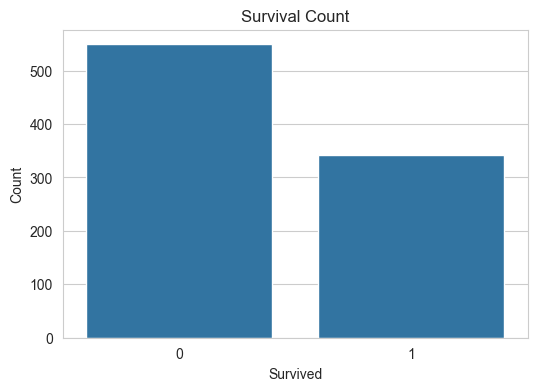

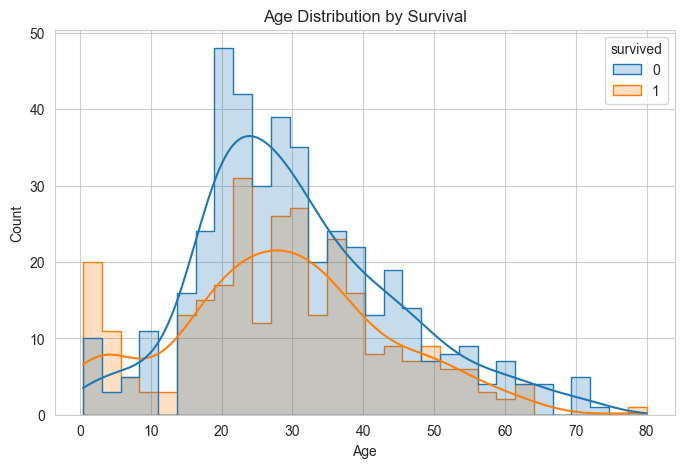

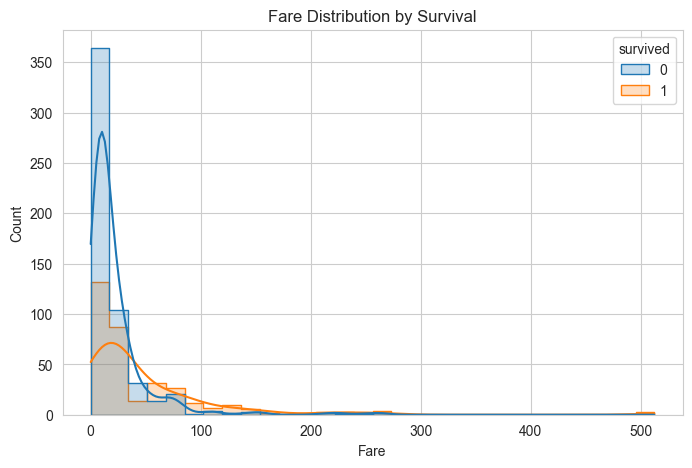

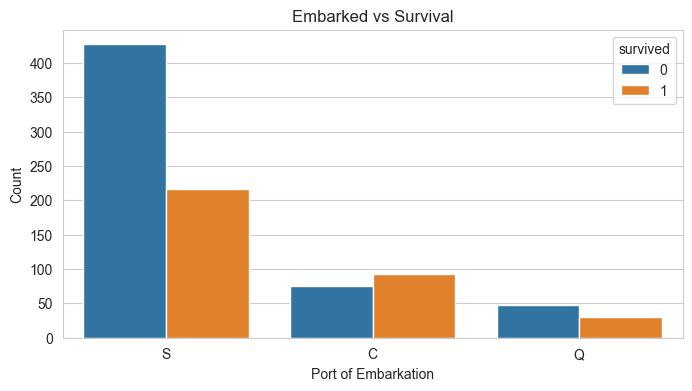

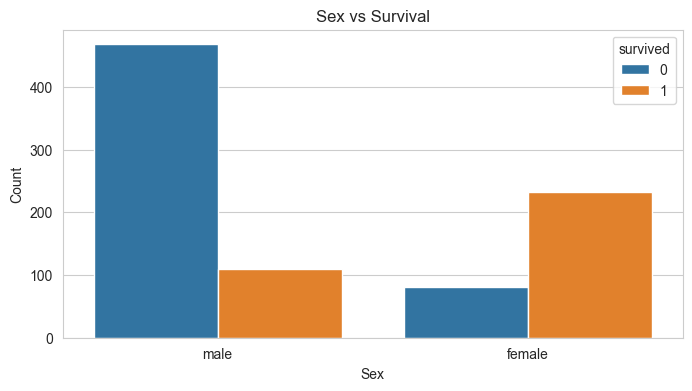

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic dataset
df = sns.load_dataset("titanic")
df = df[["age", "fare", "embarked", "sex", "survived"]]

# 1. Survival Count Plot
plt.figure(figsize=(6, 4))
sns.countplot(x="survived", data=df)
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

# 2. Age Distribution by Survival
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="age", hue="survived", kde=True, element="step", bins=30)
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 3. Fare Distribution by Survival
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="fare", hue="survived", kde=True, element="step", bins=30)
plt.title("Fare Distribution by Survival")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

# 4. Embarked vs Survival Countplot
plt.figure(figsize=(8, 4))
sns.countplot(x="embarked", hue="survived", data=df)
plt.title("Embarked vs Survival")
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.show()

# 5. Sex vs Survival Countplot
plt.figure(figsize=(8, 4))
sns.countplot(x="sex", hue="survived", data=df)
plt.title("Sex vs Survival")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

In [99]:
# Sample DataFrame
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame({'Color': ['Red', 'Blue', 'Green', 'Red', 'Green']})

encoder = OneHotEncoder(sparse_output=False)  # use 'sparse_output' for new versions
encoded = encoder.fit_transform(df[['Color']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Color']))
print(encoded_df)

   Color_Blue  Color_Green  Color_Red
0         0.0          0.0        1.0
1         1.0          0.0        0.0
2         0.0          1.0        0.0
3         0.0          0.0        1.0
4         0.0          1.0        0.0


In [100]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Sample DataFrame
df = pd.DataFrame({'Size': ['Small', 'Large', 'Medium', 'Small', 'Large']})

# Define the order
size_order = ['Small', 'Medium', 'Large']

# Ordinal Encoding
encoder = OrdinalEncoder(categories=[size_order])
df['Size_encoded'] = encoder.fit_transform(df[['Size']])
print(df)

     Size  Size_encoded
0   Small           0.0
1   Large           2.0
2  Medium           1.0
3   Small           0.0
4   Large           2.0


In [101]:
import pandas as pd
from feature_engine.encoding import RareLabelEncoder

# Sample DataFrame
df = pd.DataFrame({'City': ['London', 'Paris', 'New York', 'Oslo', 'Springfield', 'London', 'Paris']})

# RareLabelEncoder (threshold: categories < 20% of data become 'Rare')
encoder = RareLabelEncoder(tol=0.2, n_categories=3, replace_with='Rare')
df['City_grouped'] = encoder.fit_transform(df[['City']])
print(df)

          City City_grouped
0       London       London
1        Paris        Paris
2     New York         Rare
3         Oslo         Rare
4  Springfield         Rare
5       London       London
6        Paris        Paris


In [106]:
import pandas as pd
from feature_engine.transformation import LogTransformer, ReciprocalTransformer
from sklearn.preprocessing import PowerTransformer as SKPowerTransformer

# Sample DataFrame
df = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

# Log transformation (only for x > 0)
log_transformer = LogTransformer(variables=['x'])
df['x_log'] = log_transformer.fit_transform(df)['x']

# Reciprocal transformation (only for x != 0)
reciprocal_transformer = ReciprocalTransformer(variables=['x'])
df['x_recip'] = reciprocal_transformer.fit_transform(df)['x']

# Power transformation (square) using pandas
df['x_pow2'] = df['x'] ** 2

# Box-Cox (only for x > 0)
boxcox_transformer = SKPowerTransformer(method='box-cox')
df['x_boxcox'] = boxcox_transformer.fit_transform(df[['x']])

# Yeo-Johnson (works for any real values)
yeojohnson_transformer = SKPowerTransformer(method='yeo-johnson')
df['x_yeojohnson'] = yeojohnson_transformer.fit_transform(df[['x']])

print(df)

    x     x_log   x_recip  x_pow2  x_boxcox  x_yeojohnson
0   1  0.000000  1.000000       1 -1.721156     -1.679550
1   2  0.693147  0.500000       4 -1.238164     -1.239326
2   3  1.098612  0.333333       9 -0.820980     -0.837738
3   4  1.386294  0.250000      16 -0.441503     -0.462634
4   5  1.609438  0.200000      25 -0.087809     -0.107369
5   6  1.791759  0.166667      36  0.246611      0.232204
6   7  1.945910  0.142857      49  0.565809      0.558899
7   8  2.079442  0.125000      64  0.872529      0.874734
8   9  2.197225  0.111111      81  1.168741      1.181228
9  10  2.302585  0.100000     100  1.455922      1.479552


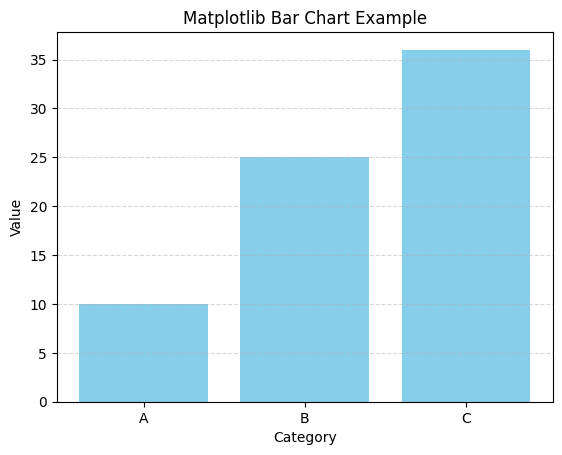

C:\Users\midas\AppData\Local\Temp\ipykernel_13388\2822975796.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




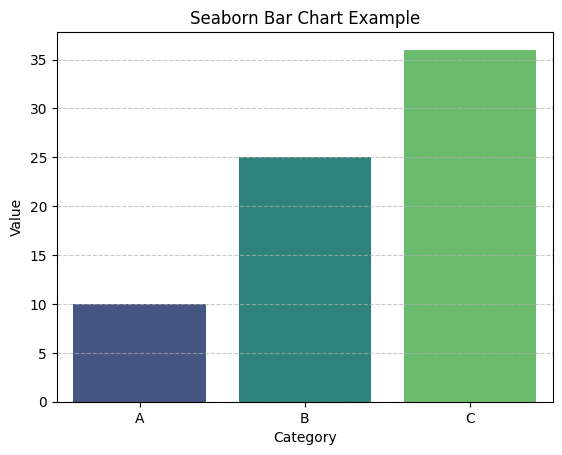

In [3]:
#Static	Stylish	Statistical plots built on Matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Simple sample data
data = pd.DataFrame({
    'Category': ['A', 'B', 'C'],
    'Value': [10, 25, 36]
})

# Matplotlib
plt.bar(data['Category'], data['Value'], color='skyblue')
plt.title('Matplotlib Bar Chart Example')
plt.xlabel('Category')
plt.ylabel('Value')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Seaborn
sns.barplot(x='Category', y='Value', data=data, palette='viridis')
plt.title('Seaborn Bar Chart Example')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotly
fig = px.bar(data, x='Category', y='Value', title="Plotly Bar Chart Example")
fig.show()

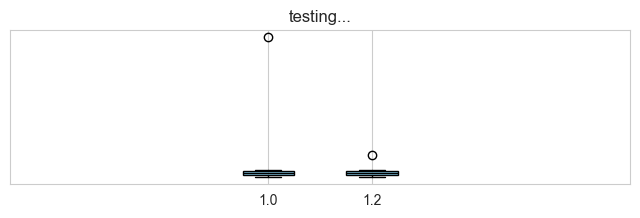

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
original = pd.Series([5, 6, 7, 8, 9, 10, 100])
capped = original.copy()
capped[capped > 20] = 20

plt.figure(figsize=(8, 2))

plt.boxplot(
    [original, capped],
    positions=[1, 1.2],        # <-- Note: now 'positions'
    widths=0.1,                # <-- Note: now 'widths'
    patch_artist=True,
    boxprops=dict(facecolor="skyblue"),
    medianprops=dict(color="black")
)

plt.title("testing...")
plt.yticks([])
plt.show()